In [1]:
#!pip install -q xplique

## Build the Use Case
We will follow the Tensorflow Tutorial from here

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

### DNN Regression
It is now time to implements single-input and multiple-inputs DNN models

In [4]:
print('---------------------------------------------------------------------------------')
print('Initializing DNN program')
print('---------------------------------------------------------------------------------')
print('')
#---------------------------------------------------------------------
# Importing Libraries

print('---------------------------------------------------------------------------------')
print('Importing Libraries')
print('---------------------------------------------------------------------------------')
print('')

import time
import tensorflow as tf
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
#import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
#from keras.callbacks import EarlyStopping
#from keras.preprocessing import sequence
#from keras.utils import pad_sequences
#from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import shap
np.random.seed(0)

#---------------------------------------------------------------------
# Defining metric equations

print('---------------------------------------------------------------------------------')
print('Defining Metric Equations')
print('---------------------------------------------------------------------------------')
print('')

def ACC(TP,TN,FP,FN):
    Acc = (TP+TN)/(TP+FP+FN+TN)
    return Acc
def ACC_2 (TP, FN):
    ac = (TP/(TP+FN))
    return ac
def PRECISION(TP,FP):
    Precision = TP/(TP+FP)
    return Precision
def RECALL(TP,FN):
    Recall = TP/(TP+FN)
    return Recall
def F1(Recall, Precision):
    F1 = 2 * Recall * Precision / (Recall + Precision)
    return F1
def BACC(TP,TN,FP,FN):
    BACC =(TP/(TP+FN)+ TN/(TN+FP))*0.5
    return BACC
def MCC(TP,TN,FP,FN):
    MCC = (TN*TP-FN*FP)/(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**.5)
    return MCC
def AUC_ROC(y_test_bin,y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    auc_avg = 0
    counting = 0
    for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
     # plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
      #print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))
      auc_avg += auc(fpr[i], tpr[i])
      counting = i+1
    return auc_avg/counting
#---------------------------------------------------------------------
# Defining features of interest
print('---------------------------------------------------------------------------------')
print('Defining features of interest')
print('---------------------------------------------------------------------------------')
print('')

req_cols = ['FLOW_DURATION_MILLISECONDS','FIRST_SWITCHED',
            'TOTAL_FLOWS_EXP','TCP_WIN_MSS_IN','LAST_SWITCHED',
            'TCP_WIN_MAX_IN','TCP_WIN_MIN_IN','TCP_WIN_MIN_OUT',
           'PROTOCOL','TCP_WIN_MAX_OUT','TCP_FLAGS',
            'TCP_WIN_SCALE_OUT','TCP_WIN_SCALE_IN','SRC_TOS',
            'DST_TOS','FLOW_ID','L4_SRC_PORT','L4_DST_PORT',
           'MIN_IP_PKT_LEN','MAX_IP_PKT_LEN','TOTAL_PKTS_EXP',
           'TOTAL_BYTES_EXP','IN_BYTES','IN_PKTS','OUT_BYTES','OUT_PKTS',
            'ALERT']
#---------------------------------------------------------------------
#Load Databases from csv file
print('---------------------------------------------------------------------------------')
print('Loading Databases')
print('---------------------------------------------------------------------------------')
print('')

print('Loading Database')
print('--------------------------------------------------')

#Denial of Service
df0 = pd.read_csv ('sensor_db/dos-03-15-2022-15-44-32.csv', usecols=req_cols)
df1 = pd.read_csv ('sensor_db/dos-03-16-2022-13-45-18.csv', usecols=req_cols)
df2 = pd.read_csv ('sensor_db/dos-03-17-2022-16-22-53.csv', usecols=req_cols)
df3 = pd.read_csv ('sensor_db/dos-03-18-2022-19-27-05.csv', usecols=req_cols)
df4 = pd.read_csv ('sensor_db/dos-03-19-2022-20-01-53.csv', usecols=req_cols)
df5 = pd.read_csv ('sensor_db/dos-03-20-2022-14-27-54.csv', usecols=req_cols)

#Normal
df7 = pd.read_csv  ('sensor_db/normal-03-15-2022-15-43-44.csv', usecols=req_cols)
df8 = pd.read_csv  ('sensor_db/normal-03-16-2022-13-44-27.csv', usecols=req_cols)
df9 = pd.read_csv  ('sensor_db/normal-03-17-2022-16-21-30.csv', usecols=req_cols)
df10 = pd.read_csv ('sensor_db/normal-03-18-2022-19-17-31.csv', usecols=req_cols)
df11 = pd.read_csv ('sensor_db/normal-03-18-2022-19-25-48.csv', usecols=req_cols)
df12 = pd.read_csv ('sensor_db/normal-03-19-2022-20-01-16.csv', usecols=req_cols)
df13 = pd.read_csv ('sensor_db/normal-03-20-2022-14-27-30.csv', usecols=req_cols)

#PortScanning
df14 = pd.read_csv  ('sensor_db/portscanning-03-15-2022-15-44-06.csv', usecols=req_cols)
df15 = pd.read_csv  ('sensor_db/portscanning-03-16-2022-13-44-50.csv', usecols=req_cols)
df16 = pd.read_csv  ('sensor_db/portscanning-03-17-2022-16-22-53.csv', usecols=req_cols)
df17 = pd.read_csv  ('sensor_db/portscanning-03-18-2022-19-27-05.csv', usecols=req_cols)
df18 = pd.read_csv  ('sensor_db/portscanning-03-19-2022-20-01-45.csv', usecols=req_cols)
df19 = pd.read_csv  ('sensor_db/portscanning-03-20-2022-14-27-49.csv', usecols=req_cols)

frames = [df0, df1, df2, df3, df4, df5, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19]

fraction = 0.01 

#concat data frames
df = pd.concat(frames,ignore_index=True)

# shuffle the DataFrame rows
df = df.sample(frac = fraction)

y = df.pop('ALERT')
X = df

df_max_scaled = X
for col in df_max_scaled.columns:
    t = abs(df_max_scaled[col].max())
    df_max_scaled[col] = df_max_scaled[col]/t
df_max_scaled
df = df_max_scaled.assign( Label = y)
#df
df = df.fillna(0)

#---------------------------------------------------------------------

# Separate features and labels 
print('---------------------------------------------------------------------------------')
print('Separating features and labels')
print('---------------------------------------------------------------------------------')
print('')

y = df.pop('Label')
X = df
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
print('---------------------------------------------------------------------------------')
result_list = [counter['None'],counter['Denial of Service'], counter['Port Scanning']]
print('number of Labels  ',result_list)
print('---------------------------------------------------------------------------------')

df = X.assign( Label = y)

#---------------------------------------------------------------------

# Separate Training and Testing db
print('---------------------------------------------------------------------------------')
print('Separating Training and Testing db')
print('---------------------------------------------------------------------------------')
print('')

# y = df_train.pop('ALERT')
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .70
#print(df.head())

train, test = df[df['is_train']==True], df[df['is_train']==False]
print('Number of the training data:', len(train))
print('Number of the testing data:', len(test))

features = df.columns[:len(req_cols)-1]

y_train, label = pd.factorize(train['Label'])
y_test, label = pd.factorize(test['Label'])

#---------------------------------------------------------------------
# Defining the DNN model

print('---------------------------------------------------------------------------------')
print('Defining the DNN model')
print('---------------------------------------------------------------------------------')
print('')

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(len(req_cols)-1,)))
model.add(tf.keras.layers.Dense(len(req_cols)))
model.add(tf.keras.layers.Dense(len(req_cols)))
model.add(tf.keras.layers.Dense(3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.summary()
#---------------------------------------------------------------------

#Training Model

print('---------------------------------------------------------------------------------')
print('Training the model')
print('---------------------------------------------------------------------------------')
print('')


#print(train[features])
#print(y_train)
#START TIMER MODEL
start = time.time()
model.fit(train[features], y_train, epochs=5, batch_size=1024)
end = time.time()
print('---------------------------------------------------------------------------------')
print('ELAPSE TIME TRAINING MODEL: ',(end - start)/60, 'min')
print('---------------------------------------------------------------------------------')
print('')
#---------------------------------------------------------------------

loss_per_epoch = model.history.history['loss']
#print(plt.plot(range(len(loss_per_epoch)),loss_per_epoch))

#---------------------------------------------------------------------



---------------------------------------------------------------------------------
Initializing DNN program
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Importing Libraries
---------------------------------------------------------------------------------



/home/oarreche@ads.iu.edu/anaconda3/envs/HITL/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---------------------------------------------------------------------------------
Defining Metric Equations
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Defining features of interest
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Loading Databases
---------------------------------------------------------------------------------

Loading Database
--------------------------------------------------
---------------------------------------------------------------------------------
Separating features and labels
---------------------------------------------------------------------------------

Counter({'None': 195583, 'Denial of Service': 64475, 'Port Scanning': 41419})
---------------------------------------------------------------------------------
number 

In [5]:

print('---------------------------------------------------------------------------------')
print('Model Prediction')
print('---------------------------------------------------------------------------------')
print('')
print('---------------------------------------------------------------------------------')
start = time.time()
y_pred = model.predict(test[features])
end = time.time()
print('ELAPSE TIME MODEL PREDICTION: ',(end - start)/60, 'min')
print('---------------------------------------------------------------------------------')
print('')

#print(y_pred)
ynew = np.argmax(y_pred,axis = 1)
#print(ynew)
score = model.evaluate(test[features], y_test,verbose=1)
#print(score)
pred_label = label[ynew]
#print(score)

#---------------------------------------------------------------------
# pd.crosstab(test['ALERT'], preds, rownames=['Actual ALERT'], colnames = ['Predicted ALERT'])

---------------------------------------------------------------------------------
Model Prediction
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------


ELAPSE TIME MODEL PREDICTION:  0.02807184060414632 min
---------------------------------------------------------------------------------

2833/2833 [==============================] - 3s 961us/step - loss: 2.4185


In [6]:
# dnn_model = build_and_compile_model()

In [7]:
dnn_model = model

In [8]:
%%time
train_features = train[features]
train_labels = y_train
history = model.fit(
#history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 34min 38s, sys: 7min 28s, total: 42min 7s
Wall time: 17min 16s


### Make predictions


In [9]:

test_features = test[features]
test_labels = y_test
#test_predictions = y_pred

In [10]:
vec = []
for i in range (len(test_labels)):
    for j in range(3):
        vec.append(test_labels[i])

test_labels = vec  

## Explain a Regression model (with Xplique)

We now have at our disposal a model trained for a regression task and we would like to use the Xplique library in order to have some highlights towards it. First, let's load this model and import the xplique library.

In [11]:
from xplique.attributions import (Saliency,
                             IntegratedGradients,
                             KernelShap,
                             Lime,
                             Occlusion,
                             SmoothGrad,
                             VarGrad,
                             SquareGrad,
                             GuidedBackprop,
                             DeconvNet,
                             GradientInput
)

In [12]:
inputs_tf, targets_tf = tf.cast(test_features, tf.float32), tf.cast(test_labels, tf.float32)
targets_tf = tf.expand_dims(targets_tf, axis=-1)
new_targets_tf = tf.ones((90628  ,1))

In [13]:
methods_params = [
    ("Saliency", Saliency, {}),
    ("Integrated Gradients", IntegratedGradients, {}),
    # ("KernelShap", KernelShap, {}),
    ("Lime", Lime, {}),
    ("Occlusion", Occlusion, {"patch_size": 1, "patch_stride": 1}),
    ("SmoothGrad", SmoothGrad, {}),
    ("VarGrad", VarGrad, {}),
    ("SquareGrad", SquareGrad, {}),
    ("GuidedBackprop", GuidedBackprop, {}),
    ("DeconvNet", DeconvNet, {}),
    ("GradientInput", GradientInput, {})
]

In [14]:
# get the different explanations
explanations = []

for name, Cls, params in methods_params:

    explainer   = Cls(dnn_model, **params)
    explanation = explainer(inputs_tf, new_targets_tf)

    explanations.append((name, explanation))

Now we will have a look at our results

In [15]:

features_name = ['FLOW_DURATION_MILLISECONDS','FIRST_SWITCHED',
            'TOTAL_FLOWS_EXP','TCP_WIN_MSS_IN','LAST_SWITCHED',
            'TCP_WIN_MAX_IN','TCP_WIN_MIN_IN','TCP_WIN_MIN_OUT',
           'PROTOCOL','TCP_WIN_MAX_OUT','TCP_FLAGS',
            'TCP_WIN_SCALE_OUT','TCP_WIN_SCALE_IN','SRC_TOS',
            'DST_TOS','FLOW_ID','L4_SRC_PORT','L4_DST_PORT'
          ]

In [34]:
print(len(req_cols))
print(len(features_name))

27
18


In [16]:
from xplique.plots import plot_feature_impact, plot_mean_feature_impact, summary_plot_tabular

In [17]:
test_features2 = test_features.values


### The mean impact for every sample

In [18]:

def _select_features(explanations, max_display, features_name):
    """
    Helper, that select max_display features. Useful if the number of features is huge.
    We keep the features which have a mean absolute impact greater than the others.
    """
    # if we have a lot of feature we will keep only max display
    if max_display is None:
        num_features_kept = len(features_name)
        features_idx_kept = np.arange(num_features_kept)
    else:
        num_features_kept = min(max_display, len(features_name))
        single_explanation = len(explanations.shape)==1
        if single_explanation:
            ranked = np.argsort(
               np.abs(explanations)
            )
        else:
            ranked = np.argsort(
                np.mean(np.abs(explanations), axis=0)
            )
        features_idx_kept = ranked[::-1][:num_features_kept]
    return num_features_kept, features_idx_kept

def _sanitize_features_name(explanations, features_name):
    """
    Helper that provide generic features name (with the feature index) if features name
    is None.
    """
    if features_name is None:
        single_explanation = len(explanations.shape)==1
        if single_explanation:
            features_name = [f"Feature {str(j)}" for j in range(len(explanations))]
        else:
            features_name = [f"Feature {str(j)}" for j in range(explanations.shape[1])]
    return features_name
def mean_feature_impact(
    explanations,
    features_name=None,
    max_display=None,
):
    """
    The same than plot_feature_importance but we will consider the mean explanation value
    grouped by feature.
    A more informative plot is the summary_plot_tabular.
    """
    # sanitize explanations to numpy array
    explanations = np.array(explanations)

    mean_explanation = np.mean(explanations, axis=0)

    explanation = explanations
    features_value=None

    # plot_feature_impact(
    #     mean_explanation_per_feature,
    #     features_name=features_name,
    #     max_display=max_display
    # )

    # sanitize to numpy array
    explanation = np.array(explanation)

    # add default features name if not provided
    features_name = _sanitize_features_name(explanation, features_name)

    # if we have a lot of feature we will keep only max display
    num_features_kept, features_idx_kept = _select_features(explanation, max_display, features_name)
    explanation_kept = explanation[features_idx_kept]

    # build y-ticks label
    yticklabels = []
    for idx_kept in features_idx_kept:
        if features_value is None:
            yticklabels.append(features_name[idx_kept])
        else:
            yticklabels.append(
                f"{str(round(features_value[idx_kept], 3))} = {features_name[idx_kept]}"
            )

    y_pos = np.arange(num_features_kept)  # the label locations

    return mean_explanation, y_pos, yticklabels


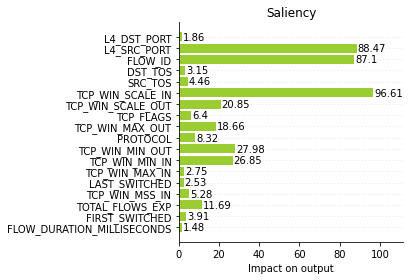

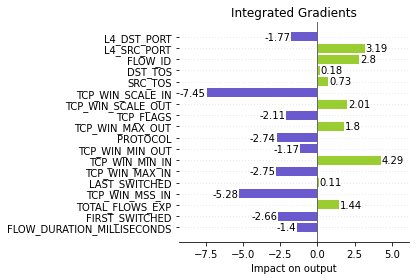

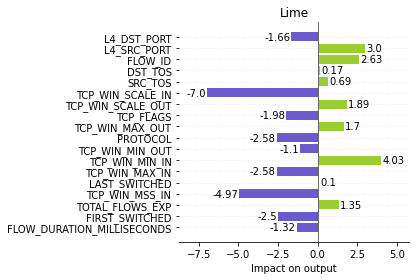

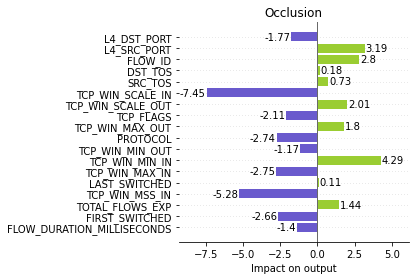

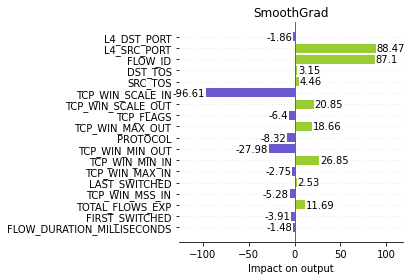

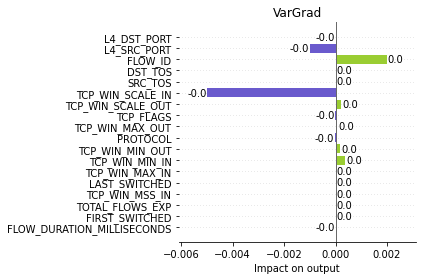

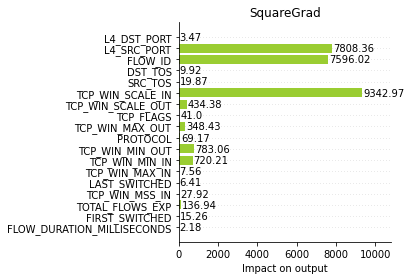

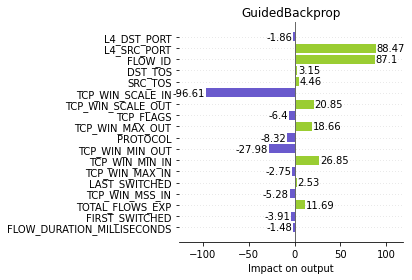

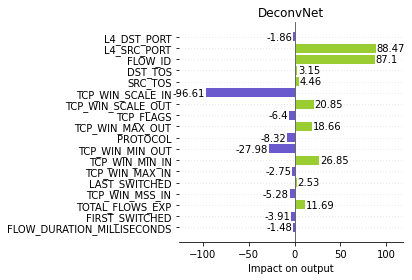

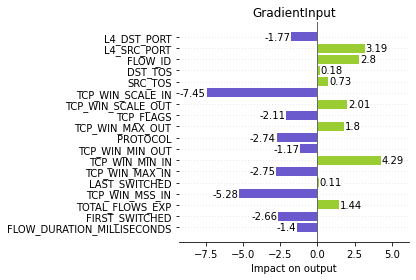

In [19]:
u = []
m = []
for exp_index, (exp_method, exp) in enumerate(explanations):
    # print(exp, features_name)
    u.append(mean_feature_impact(exp, features_name))
    m.append(exp_method)
    plot_mean_feature_impact(exp, features_name)
    # print(y_pos)
    plt.title(exp_method)
    plt.show()


In [ ]:
# features_matrix = [[0] * len(features_name) for _ in range(len(methods_params))]


In [63]:
u[9][0][25]

0.0005980696

In [48]:
len(u[j][0])

26

In [109]:
u[0][2]

['FLOW_DURATION_MILLISECONDS',
 'FIRST_SWITCHED',
 'TOTAL_FLOWS_EXP',
 'TCP_WIN_MSS_IN',
 'LAST_SWITCHED',
 'TCP_WIN_MAX_IN',
 'TCP_WIN_MIN_IN',
 'TCP_WIN_MIN_OUT',
 'PROTOCOL',
 'TCP_WIN_MAX_OUT',
 'TCP_FLAGS',
 'TCP_WIN_SCALE_OUT',
 'TCP_WIN_SCALE_IN',
 'SRC_TOS',
 'DST_TOS',
 'FLOW_ID',
 'L4_SRC_PORT',
 'L4_DST_PORT']

In [114]:

output_file_name = "xplique_test_sml_3.txt"
with open(output_file_name, "w") as f: print('---------------------------------------------------------------------------------', file = f)
with open(output_file_name, "a") as f:print("SML - XPLIQUE", file = f)

v1 = []

v3 = []

for j in range(0,len(m)):
    print(m[j])
    with open(output_file_name, "a") as f:print(m[j], file = f)
    # v1[j] = m[j] 
    # for i in range(0, len(u[0][1])):
    # # print('explainer',)
    #     print("{:<10} {:<30} {} ".format(u[j][1][i],u[j][2][i], u[j][0][i],))
    # print('')
    
    v2 = []
    for i in sorted(range(len(u[0][2])), key=lambda k: abs(u[j][0][k]), reverse=True):
        print("{:<10} {:<30} {} ".format(u[j][1][i], u[j][2][i], u[j][0][i]))
        with open(output_file_name, "a") as f:print("{:<10} {:<30} {} ".format(u[j][1][i], u[j][2][i], u[j][0][i]), file = f)
        v2.append(u[j][2][i])
        v1.append(m[j])
        # print('')
        # with open(output_file_name, "a") as f:print('', file = f)

    v3.append(v2)
    print('')
    with open(output_file_name, "a") as f:print('', file = f)

    



Saliency
12         TCP_WIN_SCALE_IN               96.61096954345703 
16         L4_SRC_PORT                    88.46739196777344 
15         FLOW_ID                        87.10118103027344 
7          TCP_WIN_MIN_OUT                27.98051643371582 
6          TCP_WIN_MIN_IN                 26.850950241088867 
11         TCP_WIN_SCALE_OUT              20.84854507446289 
9          TCP_WIN_MAX_OUT                18.66139793395996 
2          TOTAL_FLOWS_EXP                11.691279411315918 
8          PROTOCOL                       8.31657600402832 
10         TCP_FLAGS                      6.403136253356934 
3          TCP_WIN_MSS_IN                 5.281381607055664 
13         SRC_TOS                        4.460517406463623 
1          FIRST_SWITCHED                 3.9063966274261475 
14         DST_TOS                        3.1527063846588135 
5          TCP_WIN_MAX_IN                 2.7498040199279785 
4          LAST_SWITCHED                  2.5312464237213135 
17        

In [138]:
# temp = []
score = []
for j in range(len(m)):
    # score = []
    temp = []
    for i in range(len(features_name),0,-1):
        # print(i)
        temp.append(i)
    score.append(temp)

18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


In [194]:
# score

In [193]:
# v3[9]

In [124]:
# req_cols_dict = {'Average Packet Size': 0, 
#                  'Avg Bwd Segment Size': 0, 
#                  'Bwd Avg Bulk Rate': 0, 
#                  'Bwd Packet Length Max': 0,
#                    'Bwd Packet Length Mean': 0, 
#                    'Bwd Packets/s': 0, 'Destination Port': 0, 'Down/Up Ratio': 0, 
#                    'FIN Flag Count': 0, 'Flow IAT Std': 0, 
#                    'Flow Packets/s': 0, 'Fwd URG Flags': 0, 
#                    'Init_Win_bytes_backward': 0, 'Init_Win_bytes_forward': 0,
#                      'Max Packet Length': 0, 'Packet Length Mean': 0,
#                        'Packet Length Std': 0, 'Packet Length Variance': 0, 
#                        'Subflow Bwd Bytes': 0, 'Subflow Fwd Bytes': 0,
#                          'Subflow Fwd Packets': 0, 'Total Length of Bwd Packets': 0,
#                            'Total Length of Fwd Packets': 0, 'URG Flag Count': 0}

In [168]:
req_cols_dict = {
    'FLOW_DURATION_MILLISECONDS': 0,
    'FIRST_SWITCHED': 0,
    'TOTAL_FLOWS_EXP': 0,
    'TCP_WIN_MSS_IN': 0,
    'LAST_SWITCHED': 0,
    'TCP_WIN_MAX_IN': 0,
    'TCP_WIN_MIN_IN': 0,
    'TCP_WIN_MIN_OUT': 0,
    'PROTOCOL': 0,
    'TCP_WIN_MAX_OUT': 0,
    'TCP_FLAGS': 0,
    'TCP_WIN_SCALE_OUT': 0,
    'TCP_WIN_SCALE_IN': 0,
    'SRC_TOS': 0,
    'DST_TOS': 0,
    'FLOW_ID': 0,
    'L4_SRC_PORT': 0,
    'L4_DST_PORT': 0,
    'MIN_IP_PKT_LEN': 0,
    'MAX_IP_PKT_LEN': 0,
    'TOTAL_PKTS_EXP': 0,
    'TOTAL_BYTES_EXP': 0,
    'IN_BYTES': 0,
    'IN_PKTS': 0,
    'OUT_BYTES': 0,
    'OUT_PKTS': 0
}


In [192]:
# for k in req_cols_dict.keys():
#     print(k, req_cols_dict[k])

In [191]:
# req_cols_dict

{'FLOW_DURATION_MILLISECONDS': 18,
 'FIRST_SWITCHED': 17,
 'TOTAL_FLOWS_EXP': 16,
 'TCP_WIN_MSS_IN': 15,
 'LAST_SWITCHED': 14,
 'TCP_WIN_MAX_IN': 13,
 'TCP_WIN_MIN_IN': 12,
 'TCP_WIN_MIN_OUT': 11,
 'PROTOCOL': 10,
 'TCP_WIN_MAX_OUT': 9,
 'TCP_FLAGS': 8,
 'TCP_WIN_SCALE_OUT': 7,
 'TCP_WIN_SCALE_IN': 6,
 'SRC_TOS': 5,
 'DST_TOS': 4,
 'FLOW_ID': 3,
 'L4_SRC_PORT': 2,
 'L4_DST_PORT': 1,
 'MIN_IP_PKT_LEN': 0,
 'MAX_IP_PKT_LEN': 0,
 'TOTAL_PKTS_EXP': 0,
 'TOTAL_BYTES_EXP': 0,
 'IN_BYTES': 0,
 'IN_PKTS': 0,
 'OUT_BYTES': 0,
 'OUT_PKTS': 0}

In [186]:
# score[0]

[18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [187]:
for k in req_cols_dict.keys():
    # print(k, req_cols_dict[k])
    # print(k)
    for i in range(0,len(features_name)):
        # print(v3[i])
        # print(i)
        # print(k)
        # print(features_name[i])
        if k in features_name[i]: 
            # print (True)
            # print(True)
            # print(score[][i])
            # k = str(k)
            # req_cols_dict.get(k)
            # print(k)
            # print( req_cols_dict[k] )
            req_cols_dict[k] += int(score[0][i])
            

        # print(score[i],feature_names[i])

FLOW_DURATION_MILLISECONDS
FIRST_SWITCHED
TOTAL_FLOWS_EXP
TCP_WIN_MSS_IN
LAST_SWITCHED
TCP_WIN_MAX_IN
TCP_WIN_MIN_IN
TCP_WIN_MIN_OUT
PROTOCOL
TCP_WIN_MAX_OUT
TCP_FLAGS
TCP_WIN_SCALE_OUT
TCP_WIN_SCALE_IN
SRC_TOS
DST_TOS
FLOW_ID
L4_SRC_PORT
L4_DST_PORT


In [147]:
# score

In [190]:
# for k in sorted (req_cols_dict.keys()):
#     print(k, req_cols_dict[k])

In [189]:
for k, v in sorted(req_cols_dict.items(), key=lambda item: item[1], reverse=True):
    print(k, v)

FLOW_DURATION_MILLISECONDS 18
FIRST_SWITCHED 17
TOTAL_FLOWS_EXP 16
TCP_WIN_MSS_IN 15
LAST_SWITCHED 14
TCP_WIN_MAX_IN 13
TCP_WIN_MIN_IN 12
TCP_WIN_MIN_OUT 11
PROTOCOL 10
TCP_WIN_MAX_OUT 9
TCP_FLAGS 8
TCP_WIN_SCALE_OUT 7
TCP_WIN_SCALE_IN 6
SRC_TOS 5
DST_TOS 4
FLOW_ID 3
L4_SRC_PORT 2
L4_DST_PORT 1
MIN_IP_PKT_LEN 0
MAX_IP_PKT_LEN 0
TOTAL_PKTS_EXP 0
TOTAL_BYTES_EXP 0
IN_BYTES 0
IN_PKTS 0
OUT_BYTES 0
OUT_PKTS 0
